In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import interpolate
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis

In [2]:
dataprep.new_hdf5('ML_calibration_dataset')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'H2O')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'Hydrogen')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'Methane')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'CarbonMonoxide')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'CO2')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'Propane')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'Ethane')
dataprep.add_calibration('ML_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'Acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to ML_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to ML_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to ML_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to ML_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to ML_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to ML_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Propane_test.xlsx fit with compound pseudo-Vo

In [3]:
dataprep.view_hdf5('ML_calibration_dataset.hdf5')

**** ML_calibration_dataset.hdf5 ****
Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
CO2
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
CarbonMonoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
H2O
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
Methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
Propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber


In [4]:
hdf5_calfilename = 'ML_calibration_dataset.hdf5'
dataprep.view_hdf5(hdf5_calfilename)

**** ML_calibration_dataset.hdf5 ****
Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
CO2
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
CarbonMonoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
H2O
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
Methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
Propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber


In [5]:
dataprep.view_hdf5('ML_quad_calibration.hdf5')

**** ML_quad_calibration.hdf5 ****
Hydrogen+CarbonDioxide+Acetaldehyde+Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+CarbonDioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+Formic Acid
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+Methane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Acetaldehyde+Propane
|    Peak_01
|   

|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+CarbonDioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+Formic Acid
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+Methane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+Propane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonDioxide+Sapphire+Sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    c

|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Formic Acid+Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    Peak_13
|    Peak_14
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Formic Acid+CarbonDioxide
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Formic Acid+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Formic Acid+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    Peak_13
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Formic Ac

|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Sapphire+Water
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Water+Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    Peak_13
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Water+CarbonDioxide
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Water+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
Hydrogen+CarbonMonoxide+Water+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    

|    Peak_10
|    Peak_11
|    Peak_12
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Ethane+Formic Acid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Ethane+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Ethane+Methane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Ethane+Propane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    counts
|    residuals
| 

|    Peak_11
|    Peak_12
|    Peak_13
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Water+CarbonDioxide
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Water+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Water+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Water+Formic Acid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+Formic Acid+Water+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    cou

|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Ethane+Water
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Formic Acid+Acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Formic Acid+CarbonDioxide
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Formic Acid+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Formic Acid+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09


|    wavenumber
Hydrogen+Hydrogen+Sapphire+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Sapphire+Methane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Sapphire+Propane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Sapphire+Sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Sapphire+Water
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+Hydrogen+Water+Acetaldehyde
|    Peak_0

Hydrogen+Sapphire+Ethane+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Ethane+Methane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Ethane+Propane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Ethane+Sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Ethane+Water
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06


|    Peak_11
|    Peak_12
|    Peak_13
|    Peak_14
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Sapphire+CarbonDioxide
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Sapphire+CarbonMonoxide
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Sapphire+Ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Sapphire+Formic Acid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    Peak_09
|    Peak_10
|    Peak_11
|    Peak_12
|    Peak_13
|    counts
|    residuals
|    wavenumber
Hydrogen+Sapphire+Sapphire+Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Pea

In [6]:
dataprep.view_hdf5('dataimport_ML_df.hdf5')

**** dataimport_ML_df.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    

|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
390C
|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    20s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
| 

In [7]:
dataprep.new_hdf5('ML_exp_test')


In [8]:
dataprep.view_hdf5('ML_exp_test.hdf5')

**** ML_exp_test.hdf5 ****


In [9]:
hdf5_filename = 'ML_exp_test.hdf5'
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_35s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_45s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_55s.csv')
dataprep.add_experiment(hdf5_filename, '../ramandecompy/tests/test_files/FA_3.6wt%_300C_65s.csv')

Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv fit with compound pseudo-Voigt model. Results saved to ML_exp_test.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_35s.csv fit with compound pseudo-Voigt model. Results saved to ML_exp_test.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_45s.csv fit with compound pseudo-Voigt model. Results saved to ML_exp_test.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_55s.csv fit with compound pseudo-Voigt model. Results saved to ML_exp_test.hdf5.
Data from ../ramandecompy/tests/test_files/FA_3.6wt%_300C_65s.csv fit with compound pseudo-Voigt model. Results saved to ML_exp_test.hdf5.


The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks t

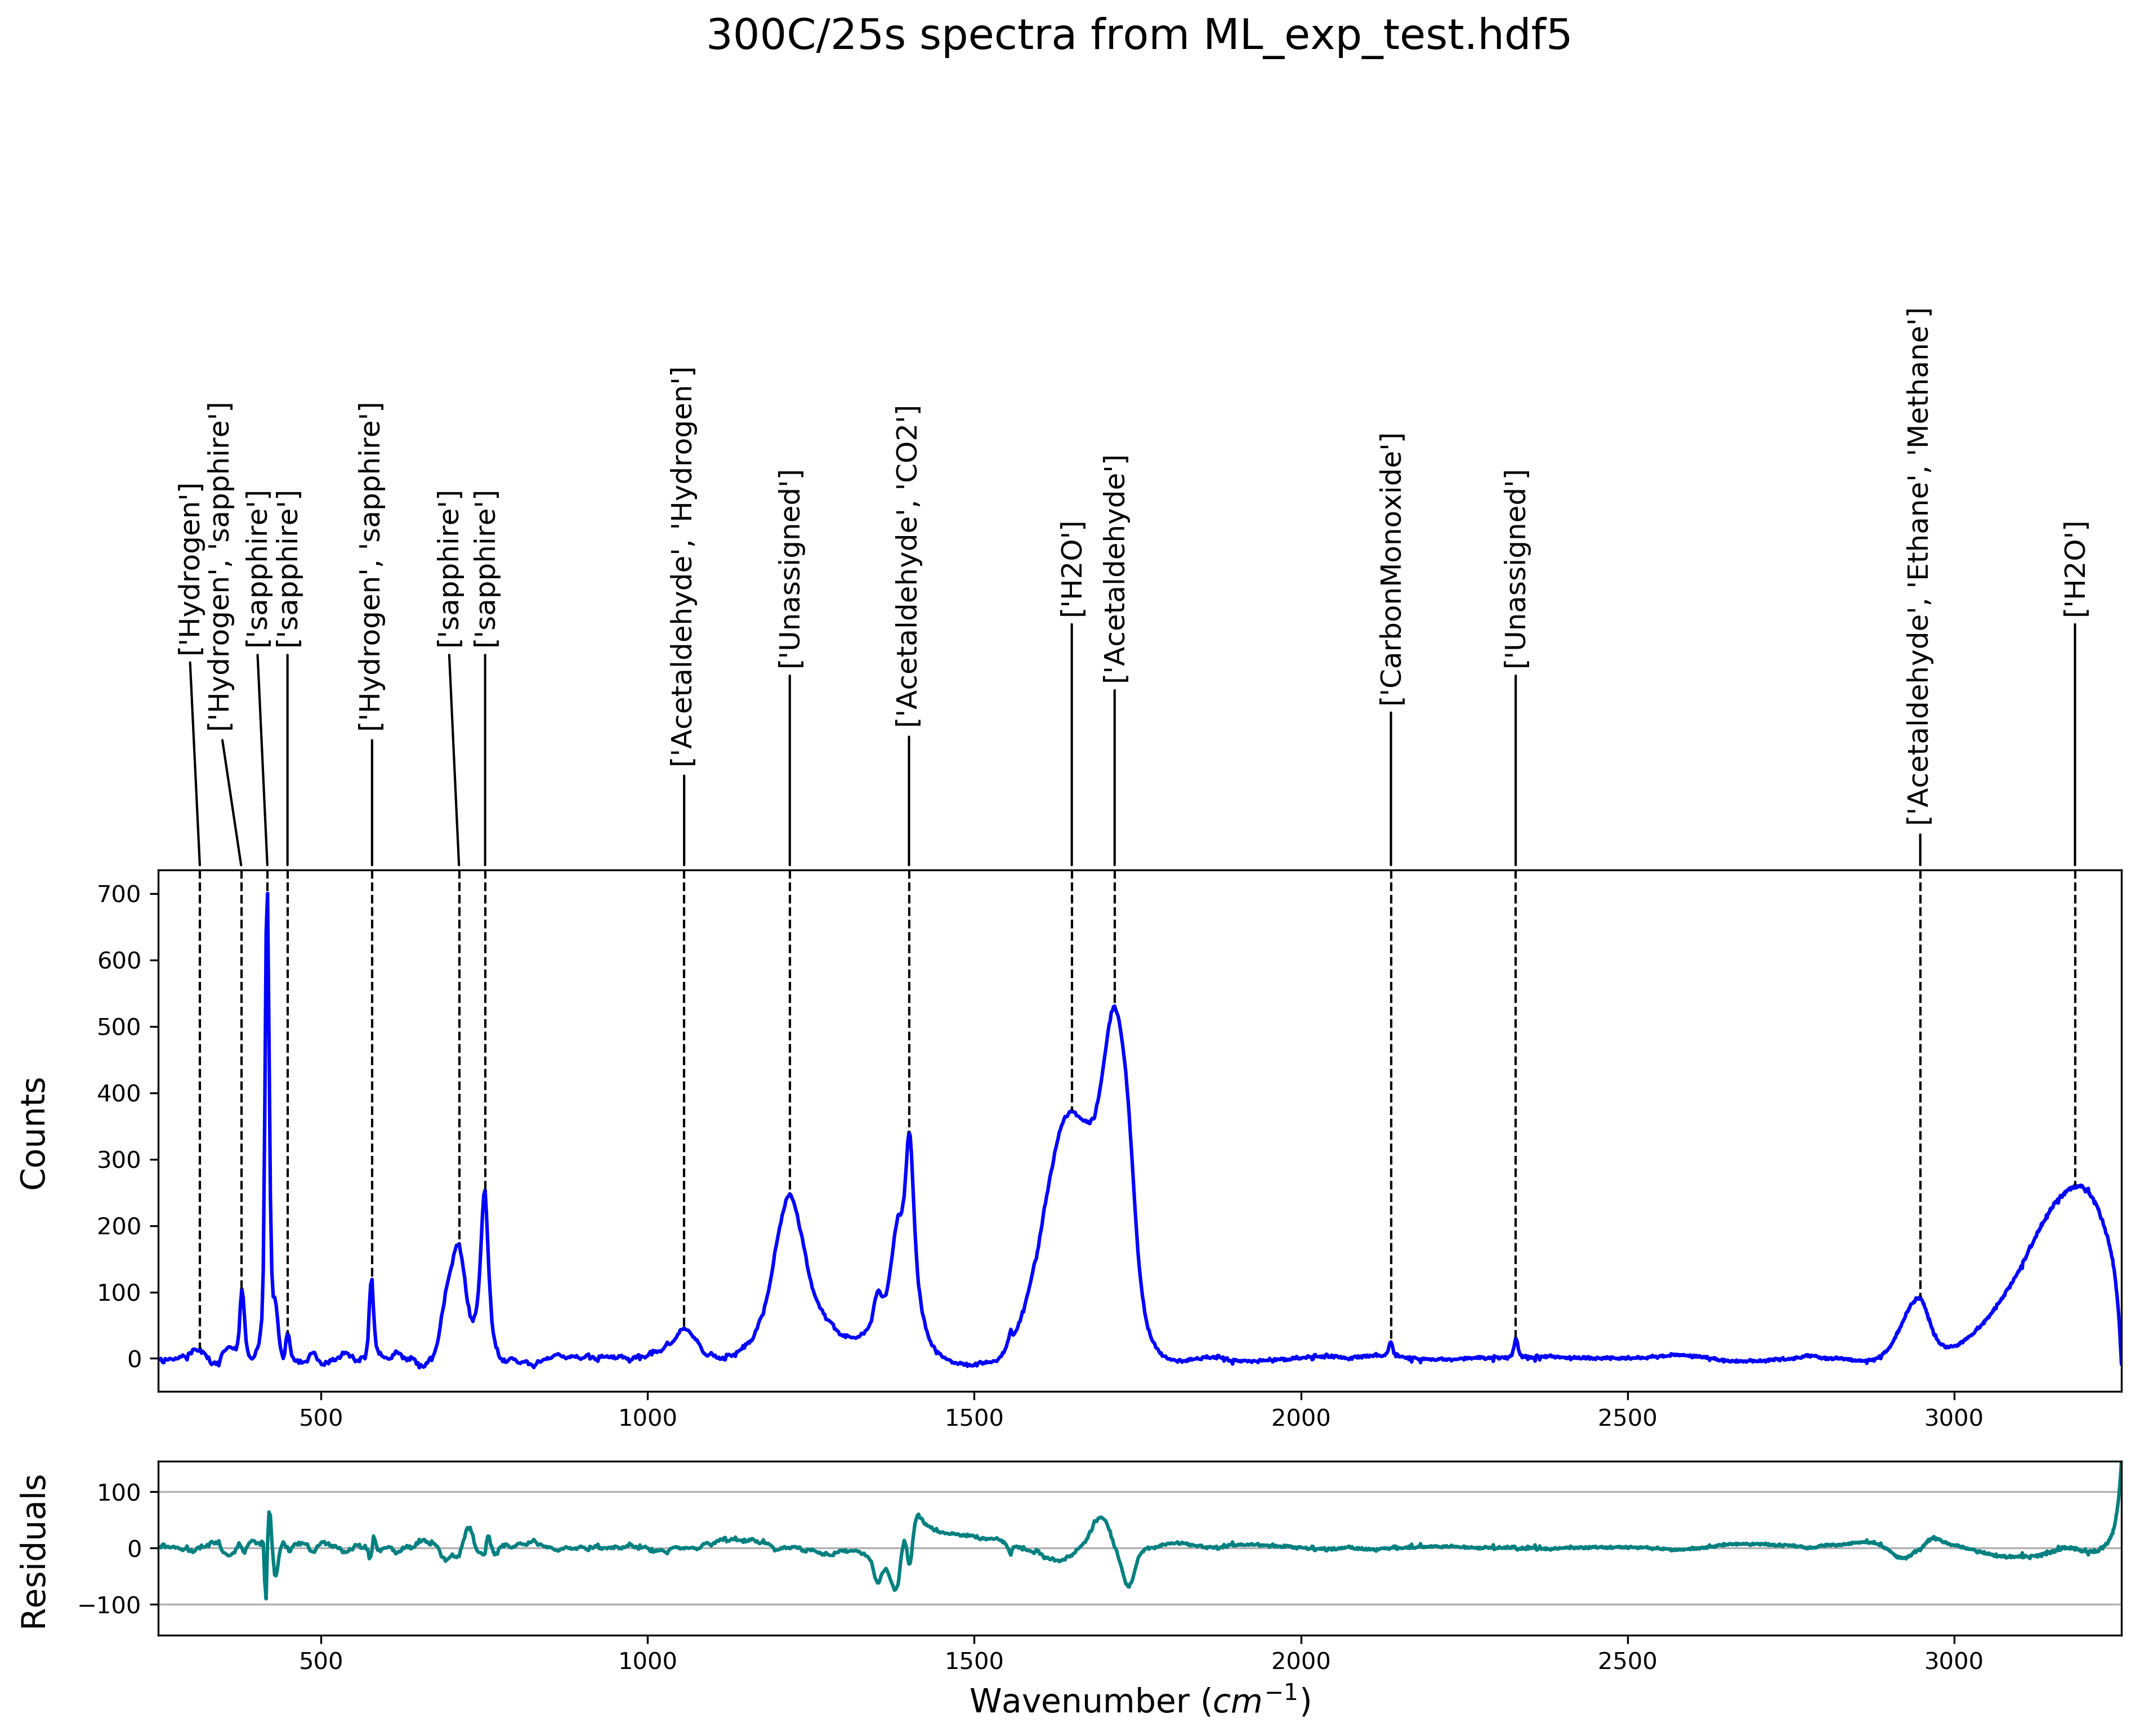

{'Acetaldehyde': 50.0, 'CO2': 50.0, 'CarbonMonoxide': 100.0, 'Ethane': 33.33333333333333, 'H2O': 100.0, 'Hydrogen': 100.0, 'Methane': 100.0, 'Propane': 0.0, 'sapphire': 150.0}


In [10]:
hdf5_calfilename = 'ML_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'ML_exp_test.hdf5'
key = '300C/25s'
df1 = peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50)

In [11]:
df1

,0,1,2,3,4,5,6,7
0,2.66632e-06,9.47784,314.77,251.853,18.9557,12.4817,251.852,['Hydrogen']
0,0.506813,4.0129,378.71,1034.01,8.0258,101.26,1028.59,"['Hydrogen', 'sapphire']"
0,0.636782,3.84759,418.14,7306.16,7.69519,708.864,7270.35,['sapphire']
0,2.55231e-05,2.69962,448.67,193.734,5.39924,33.7084,193.741,['sapphire']
0,0.188666,4.21062,578.11,1090.47,8.42124,114.25,1089.49,"['Hydrogen', 'sapphire']"
0,1.38778e-15,20.4979,711.51,6837.15,40.9957,156.677,6837.15,['sapphire']
0,6.88713e-07,7.19462,751.21,3533.44,14.3892,230.689,3533.44,['sapphire']
0,0,18.0052,1055.9,1438.24,36.0103,37.5207,1438.24,"['Acetaldehyde', 'Hydrogen']"
0,0.841161,29.1589,1217.6,20781.3,58.3177,243.997,20534.1,['Unassigned']
0,1,15.8466,1400.1,15275.1,31.6932,306.831,15166.6,"['Acetaldehyde', 'CO2']"


The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks t

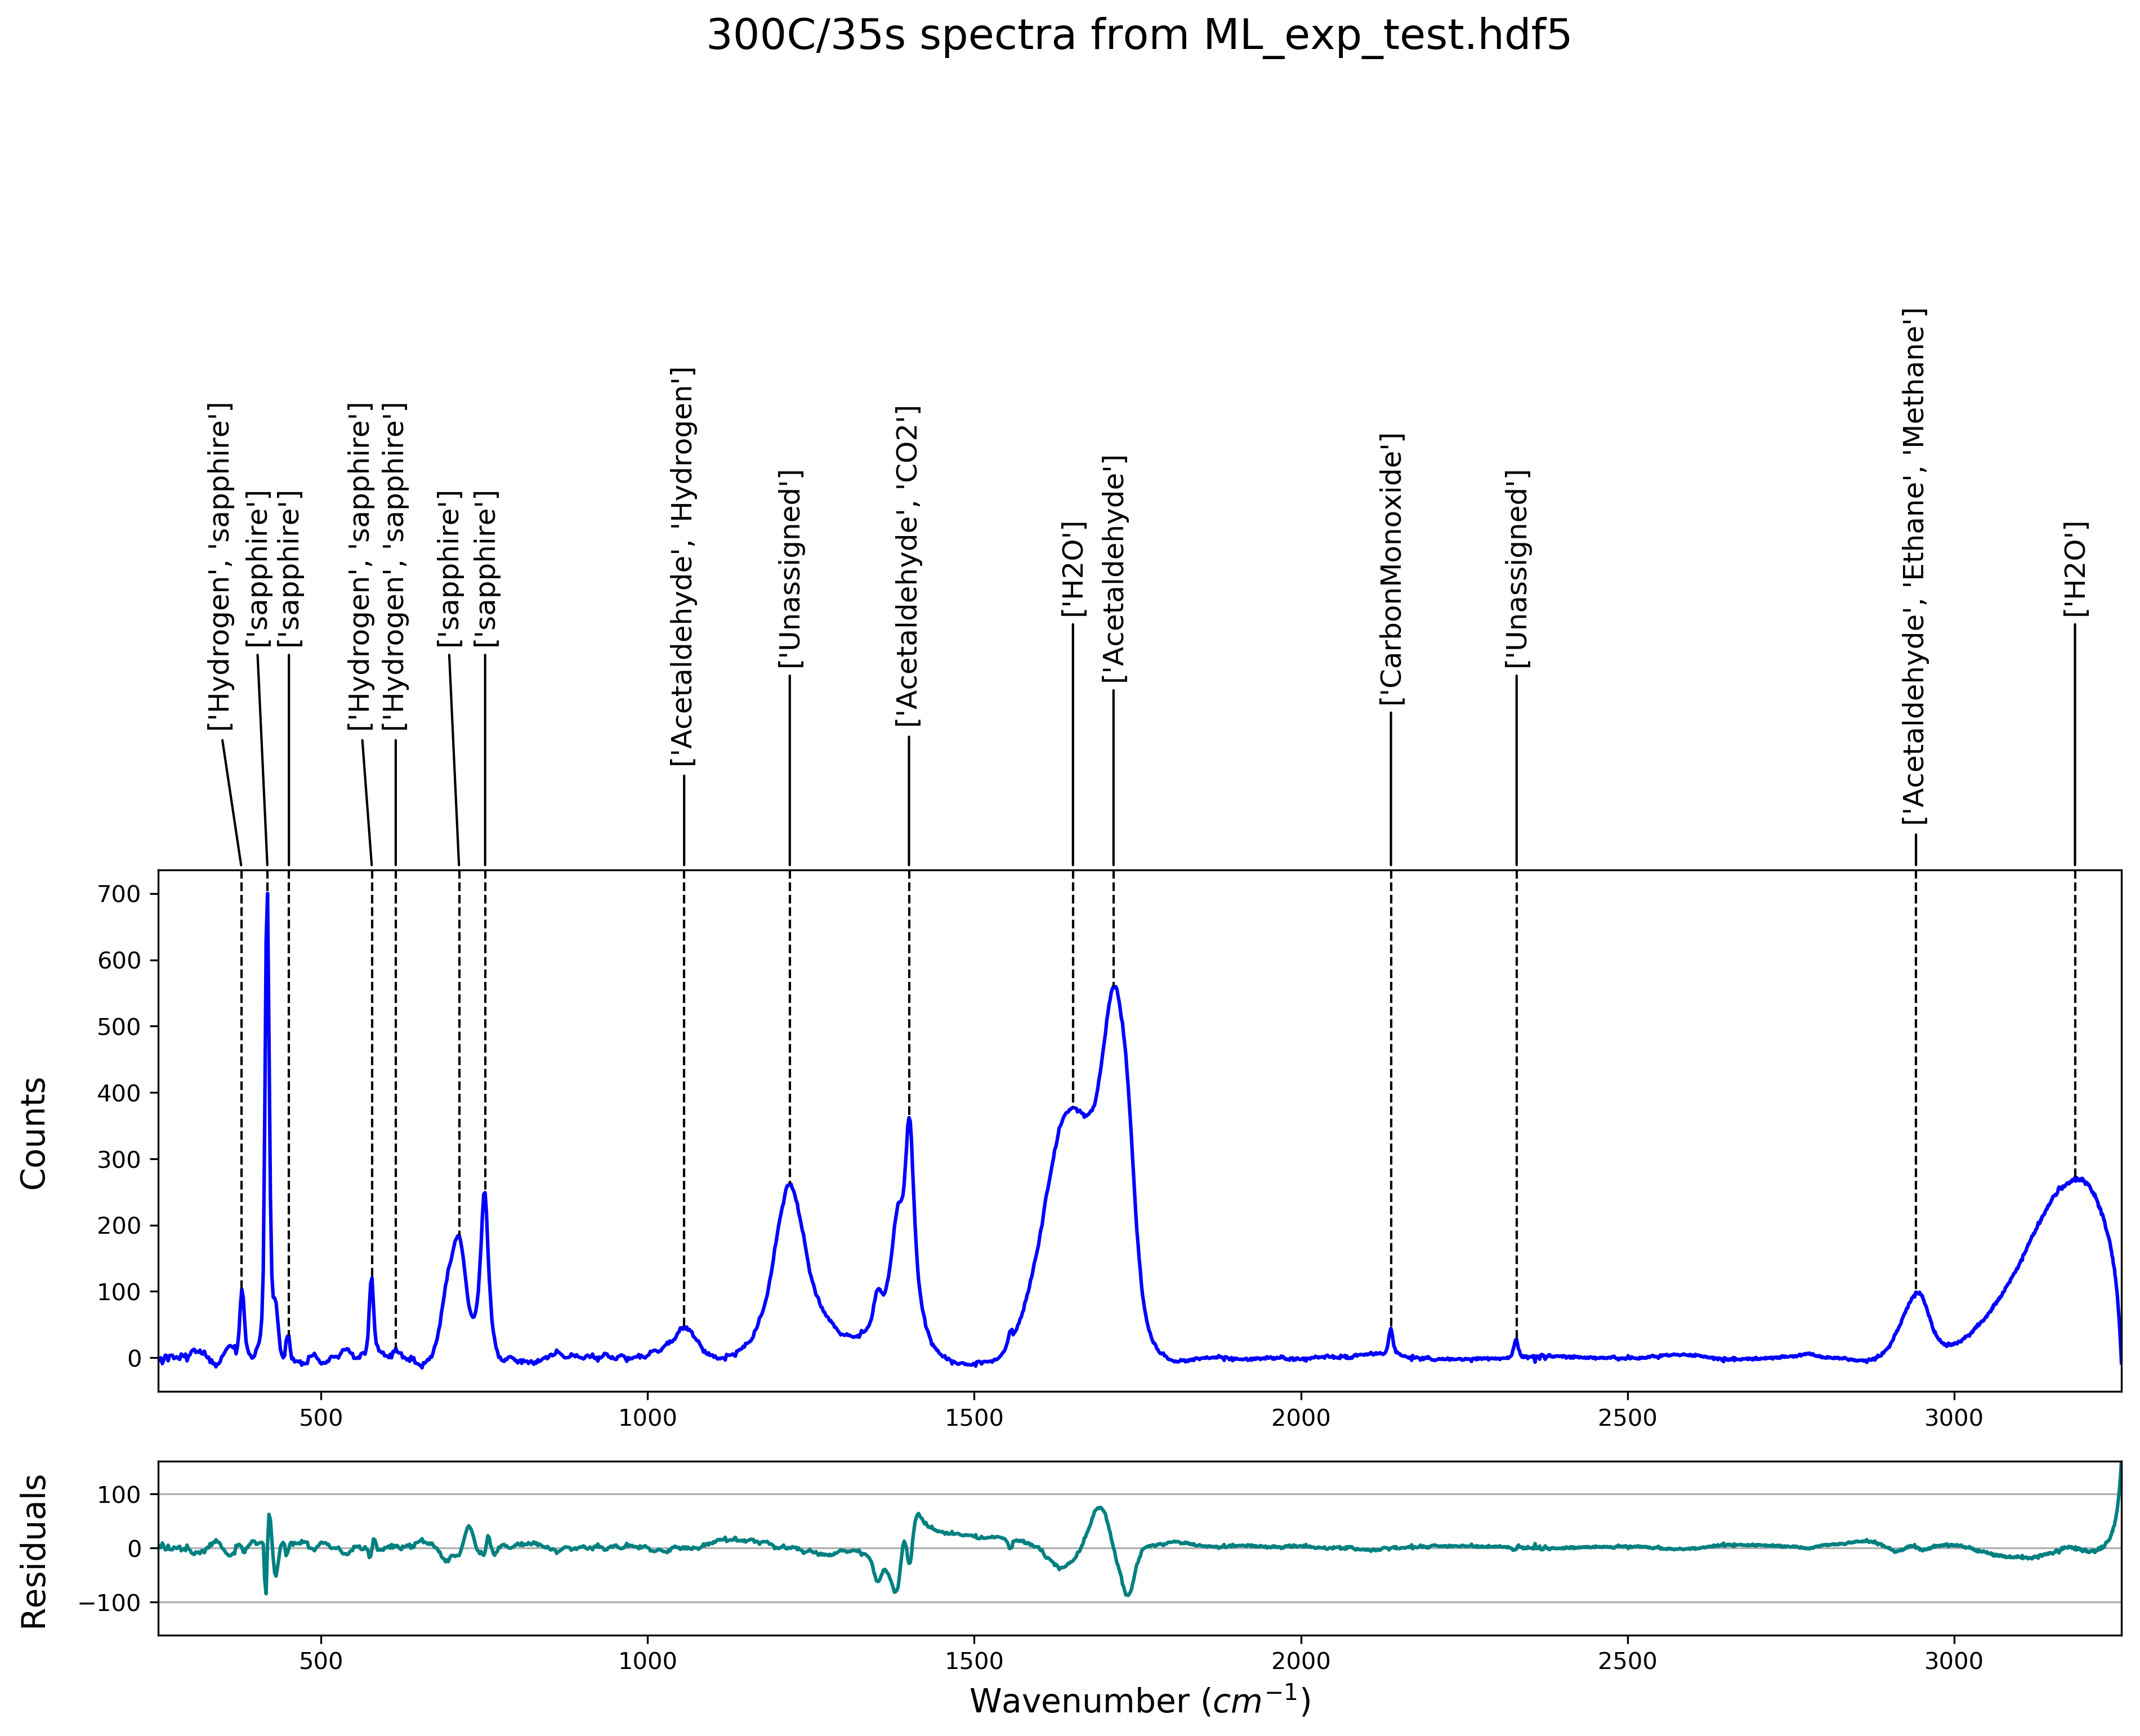

{'Acetaldehyde': 50.0, 'CO2': 50.0, 'CarbonMonoxide': 100.0, 'Ethane': 33.33333333333333, 'H2O': 100.0, 'Hydrogen': 100.0, 'Methane': 100.0, 'Propane': 0.0, 'sapphire': 175.0}


In [12]:
hdf5_calfilename = 'ML_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'ML_exp_test.hdf5'
key = '300C/35s'
df2 = peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50)


The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for Prop

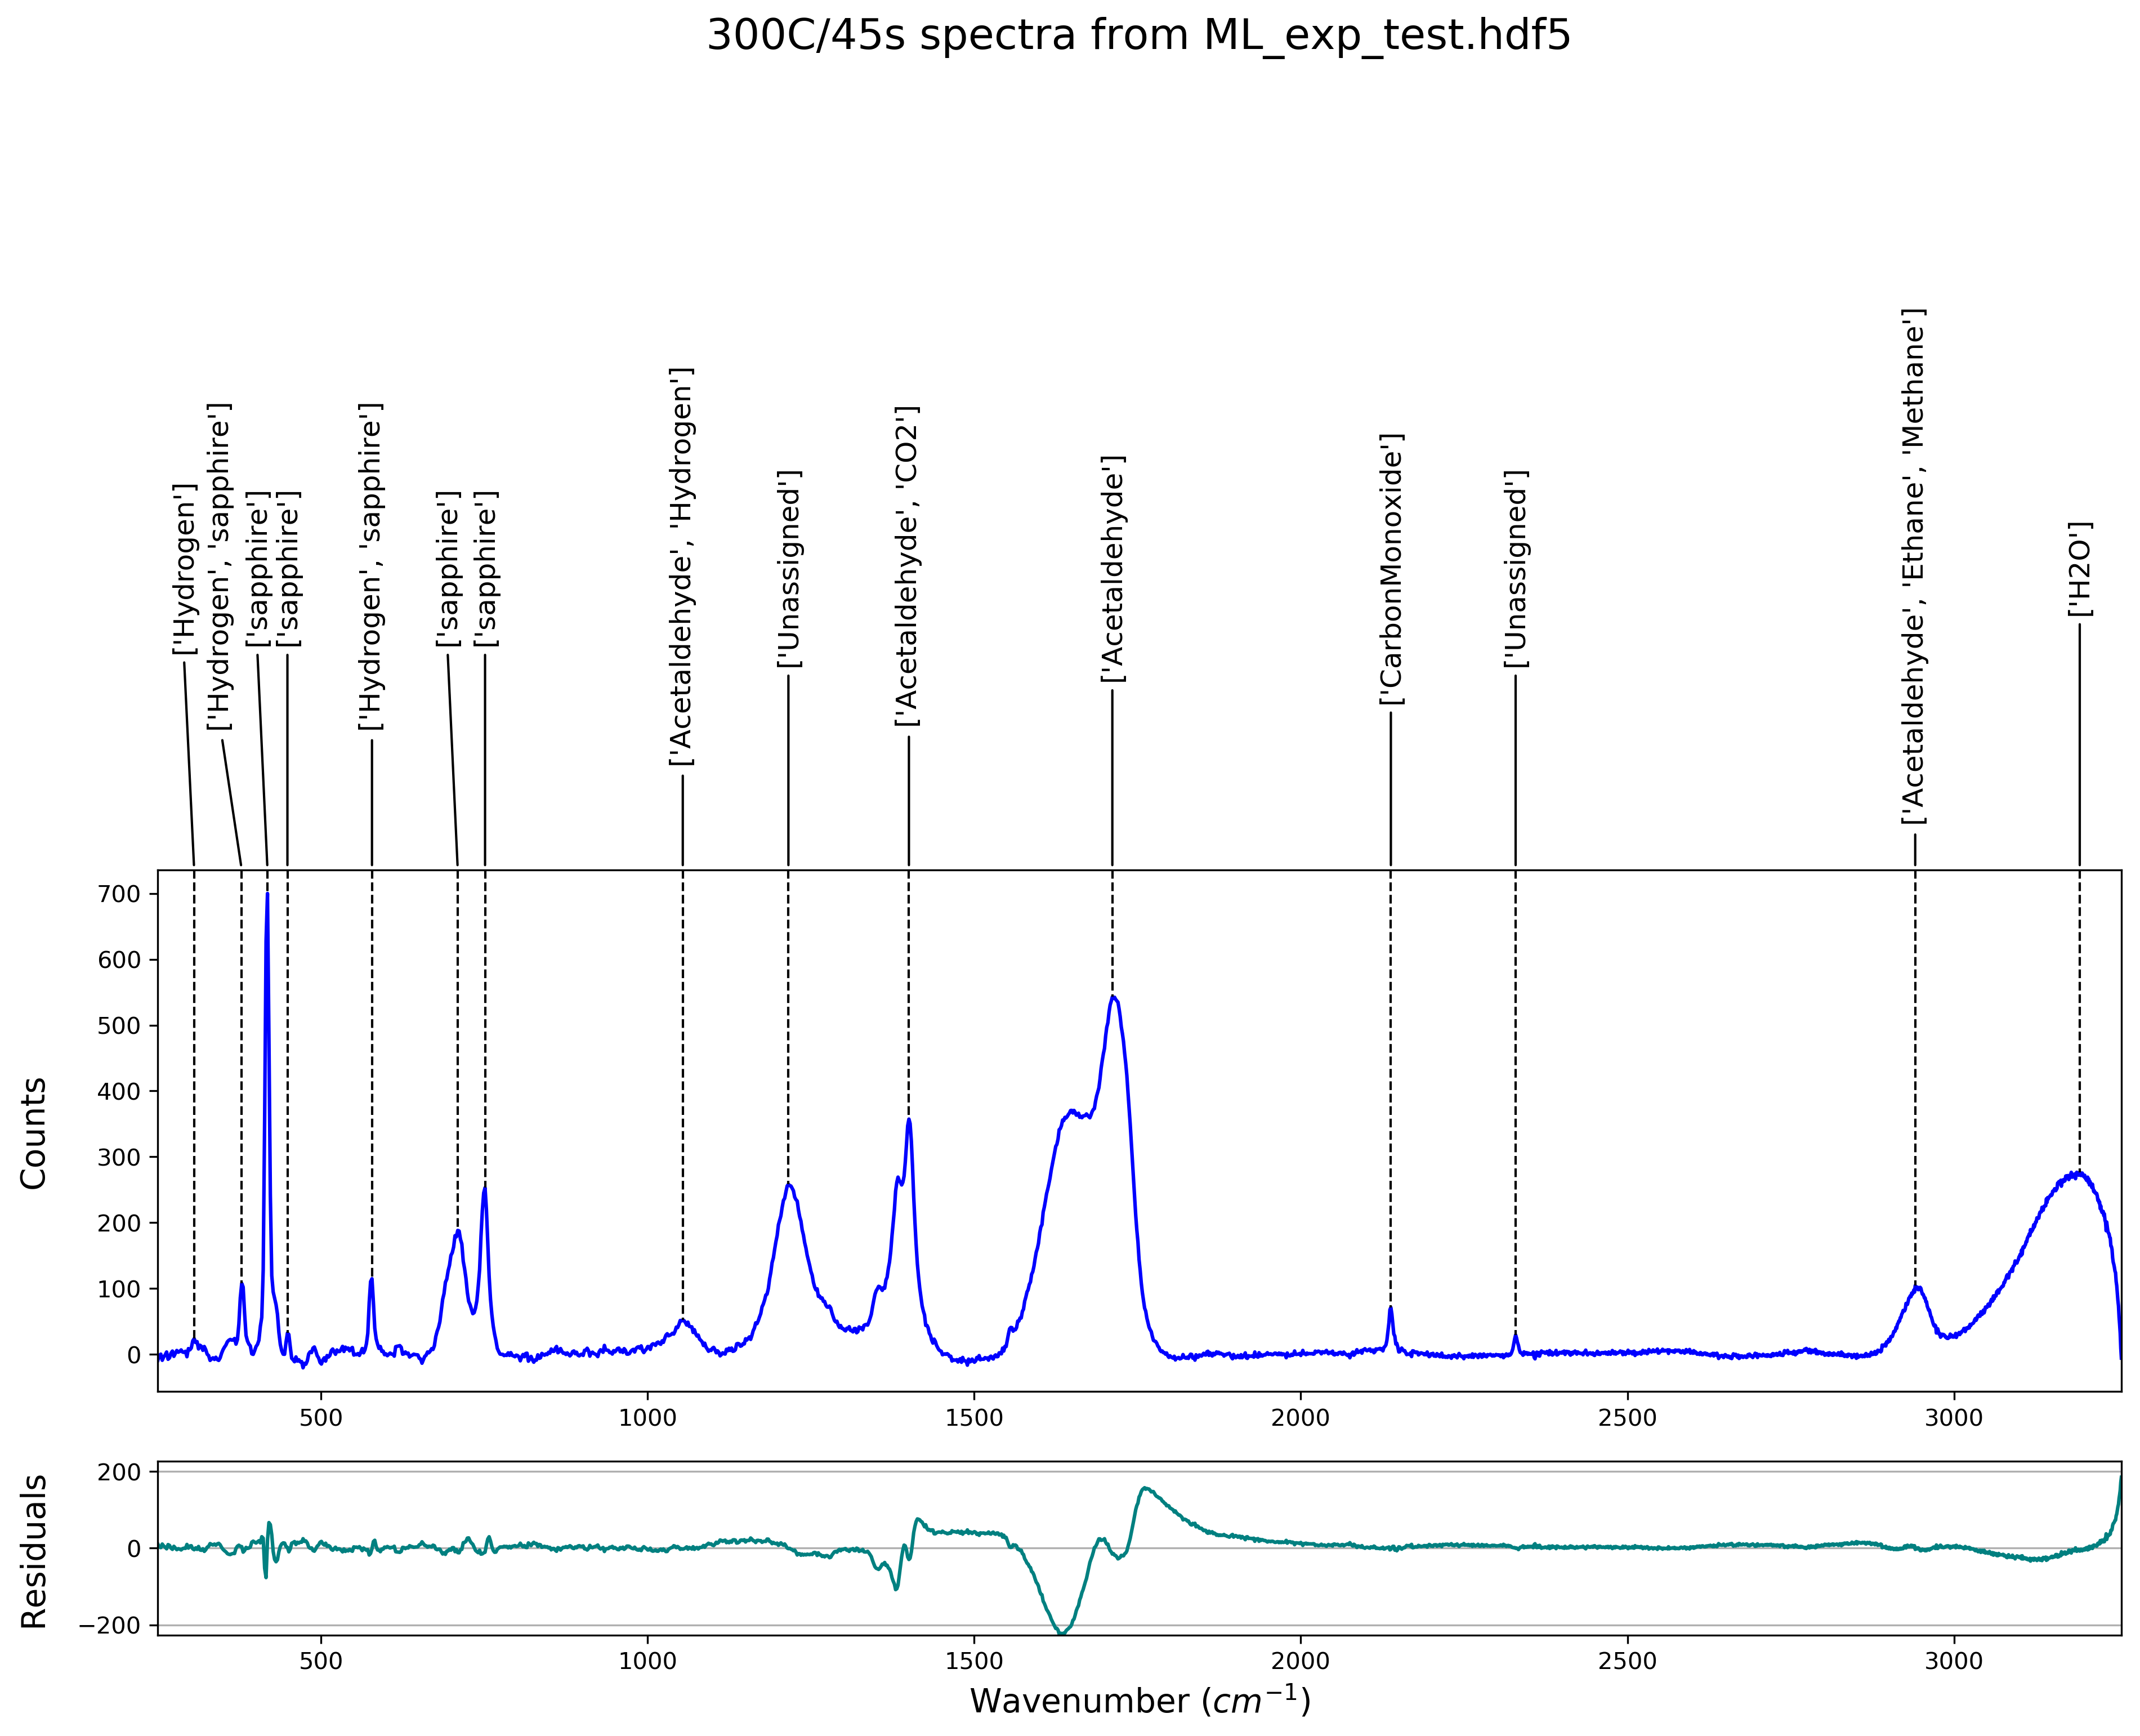

{'Acetaldehyde': 50.0, 'CO2': 50.0, 'CarbonMonoxide': 100.0, 'Ethane': 33.33333333333333, 'H2O': 50.0, 'Hydrogen': 100.0, 'Methane': 100.0, 'Propane': 0.0, 'sapphire': 150.0}


In [13]:
hdf5_calfilename = 'ML_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'ML_exp_test.hdf5'
key = '300C/45s'
df3 = peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50)


The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for Prop

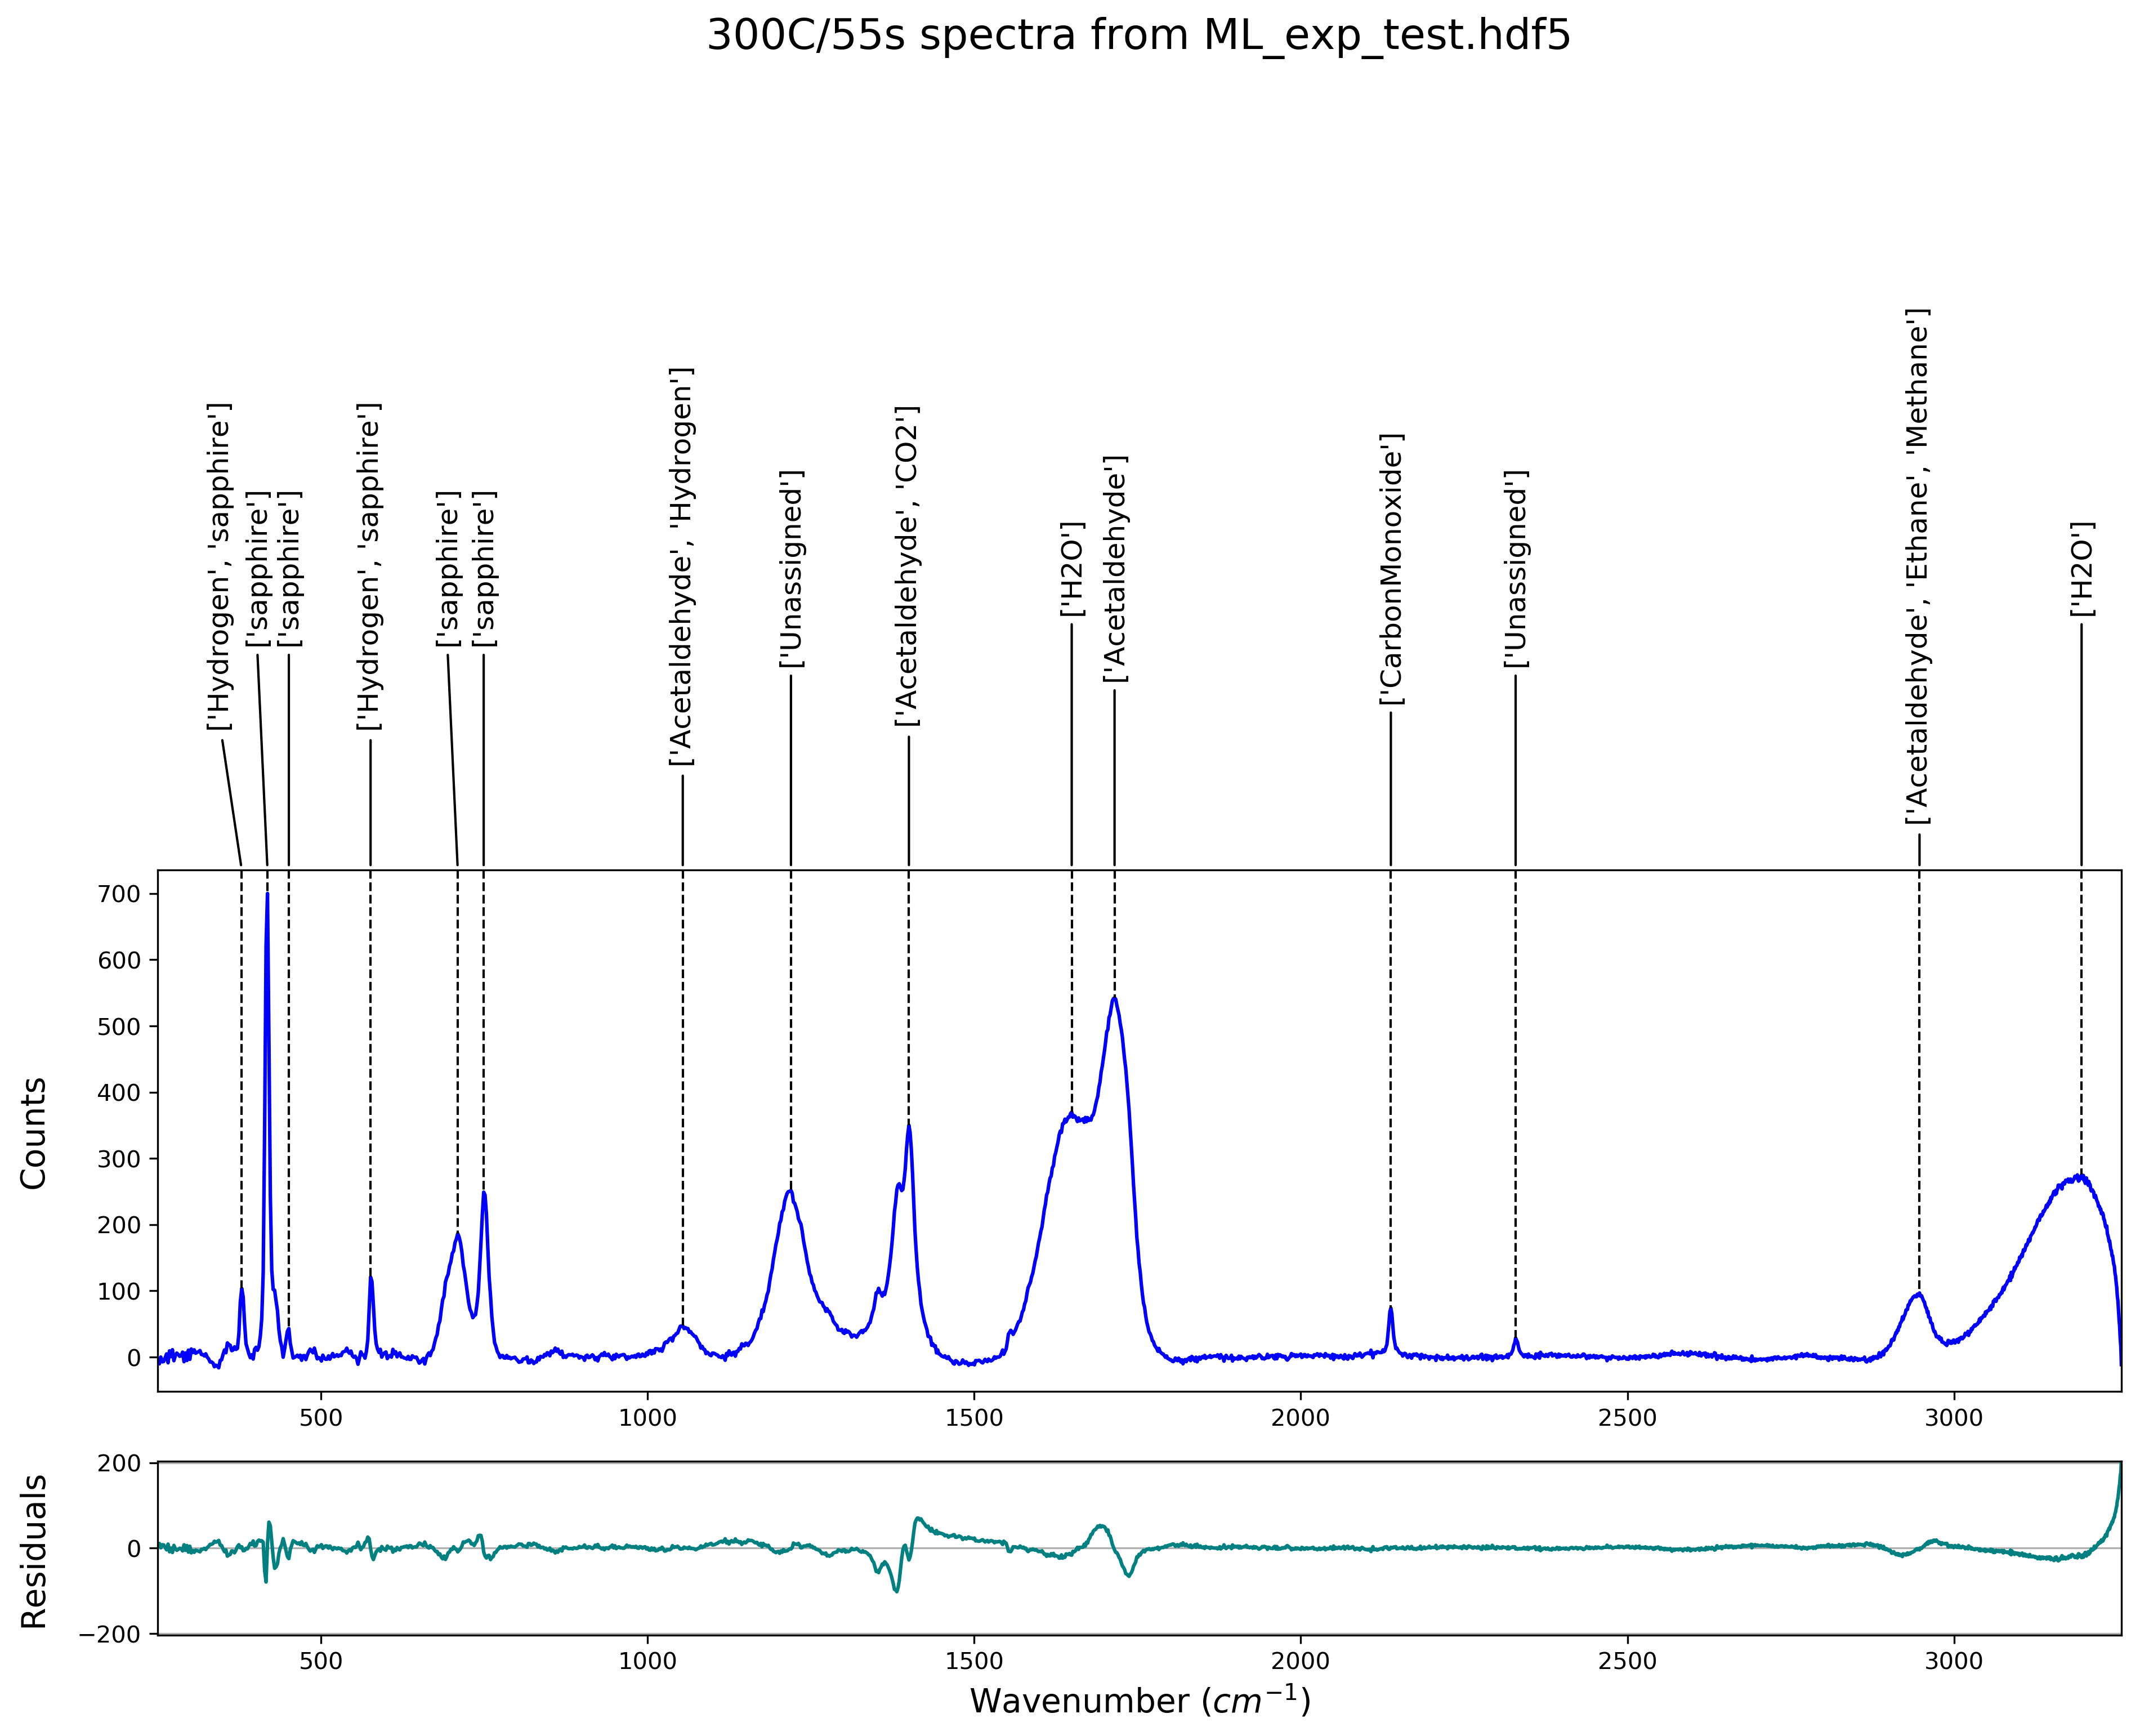

{'Acetaldehyde': 50.0, 'CO2': 50.0, 'CarbonMonoxide': 100.0, 'Ethane': 33.33333333333333, 'H2O': 100.0, 'Hydrogen': 75.0, 'Methane': 100.0, 'Propane': 0.0, 'sapphire': 150.0}


In [14]:
hdf5_calfilename = 'ML_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'ML_exp_test.hdf5'
key = '300C/55s'
df4 = peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50)


The peaks that we found for Acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for Ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

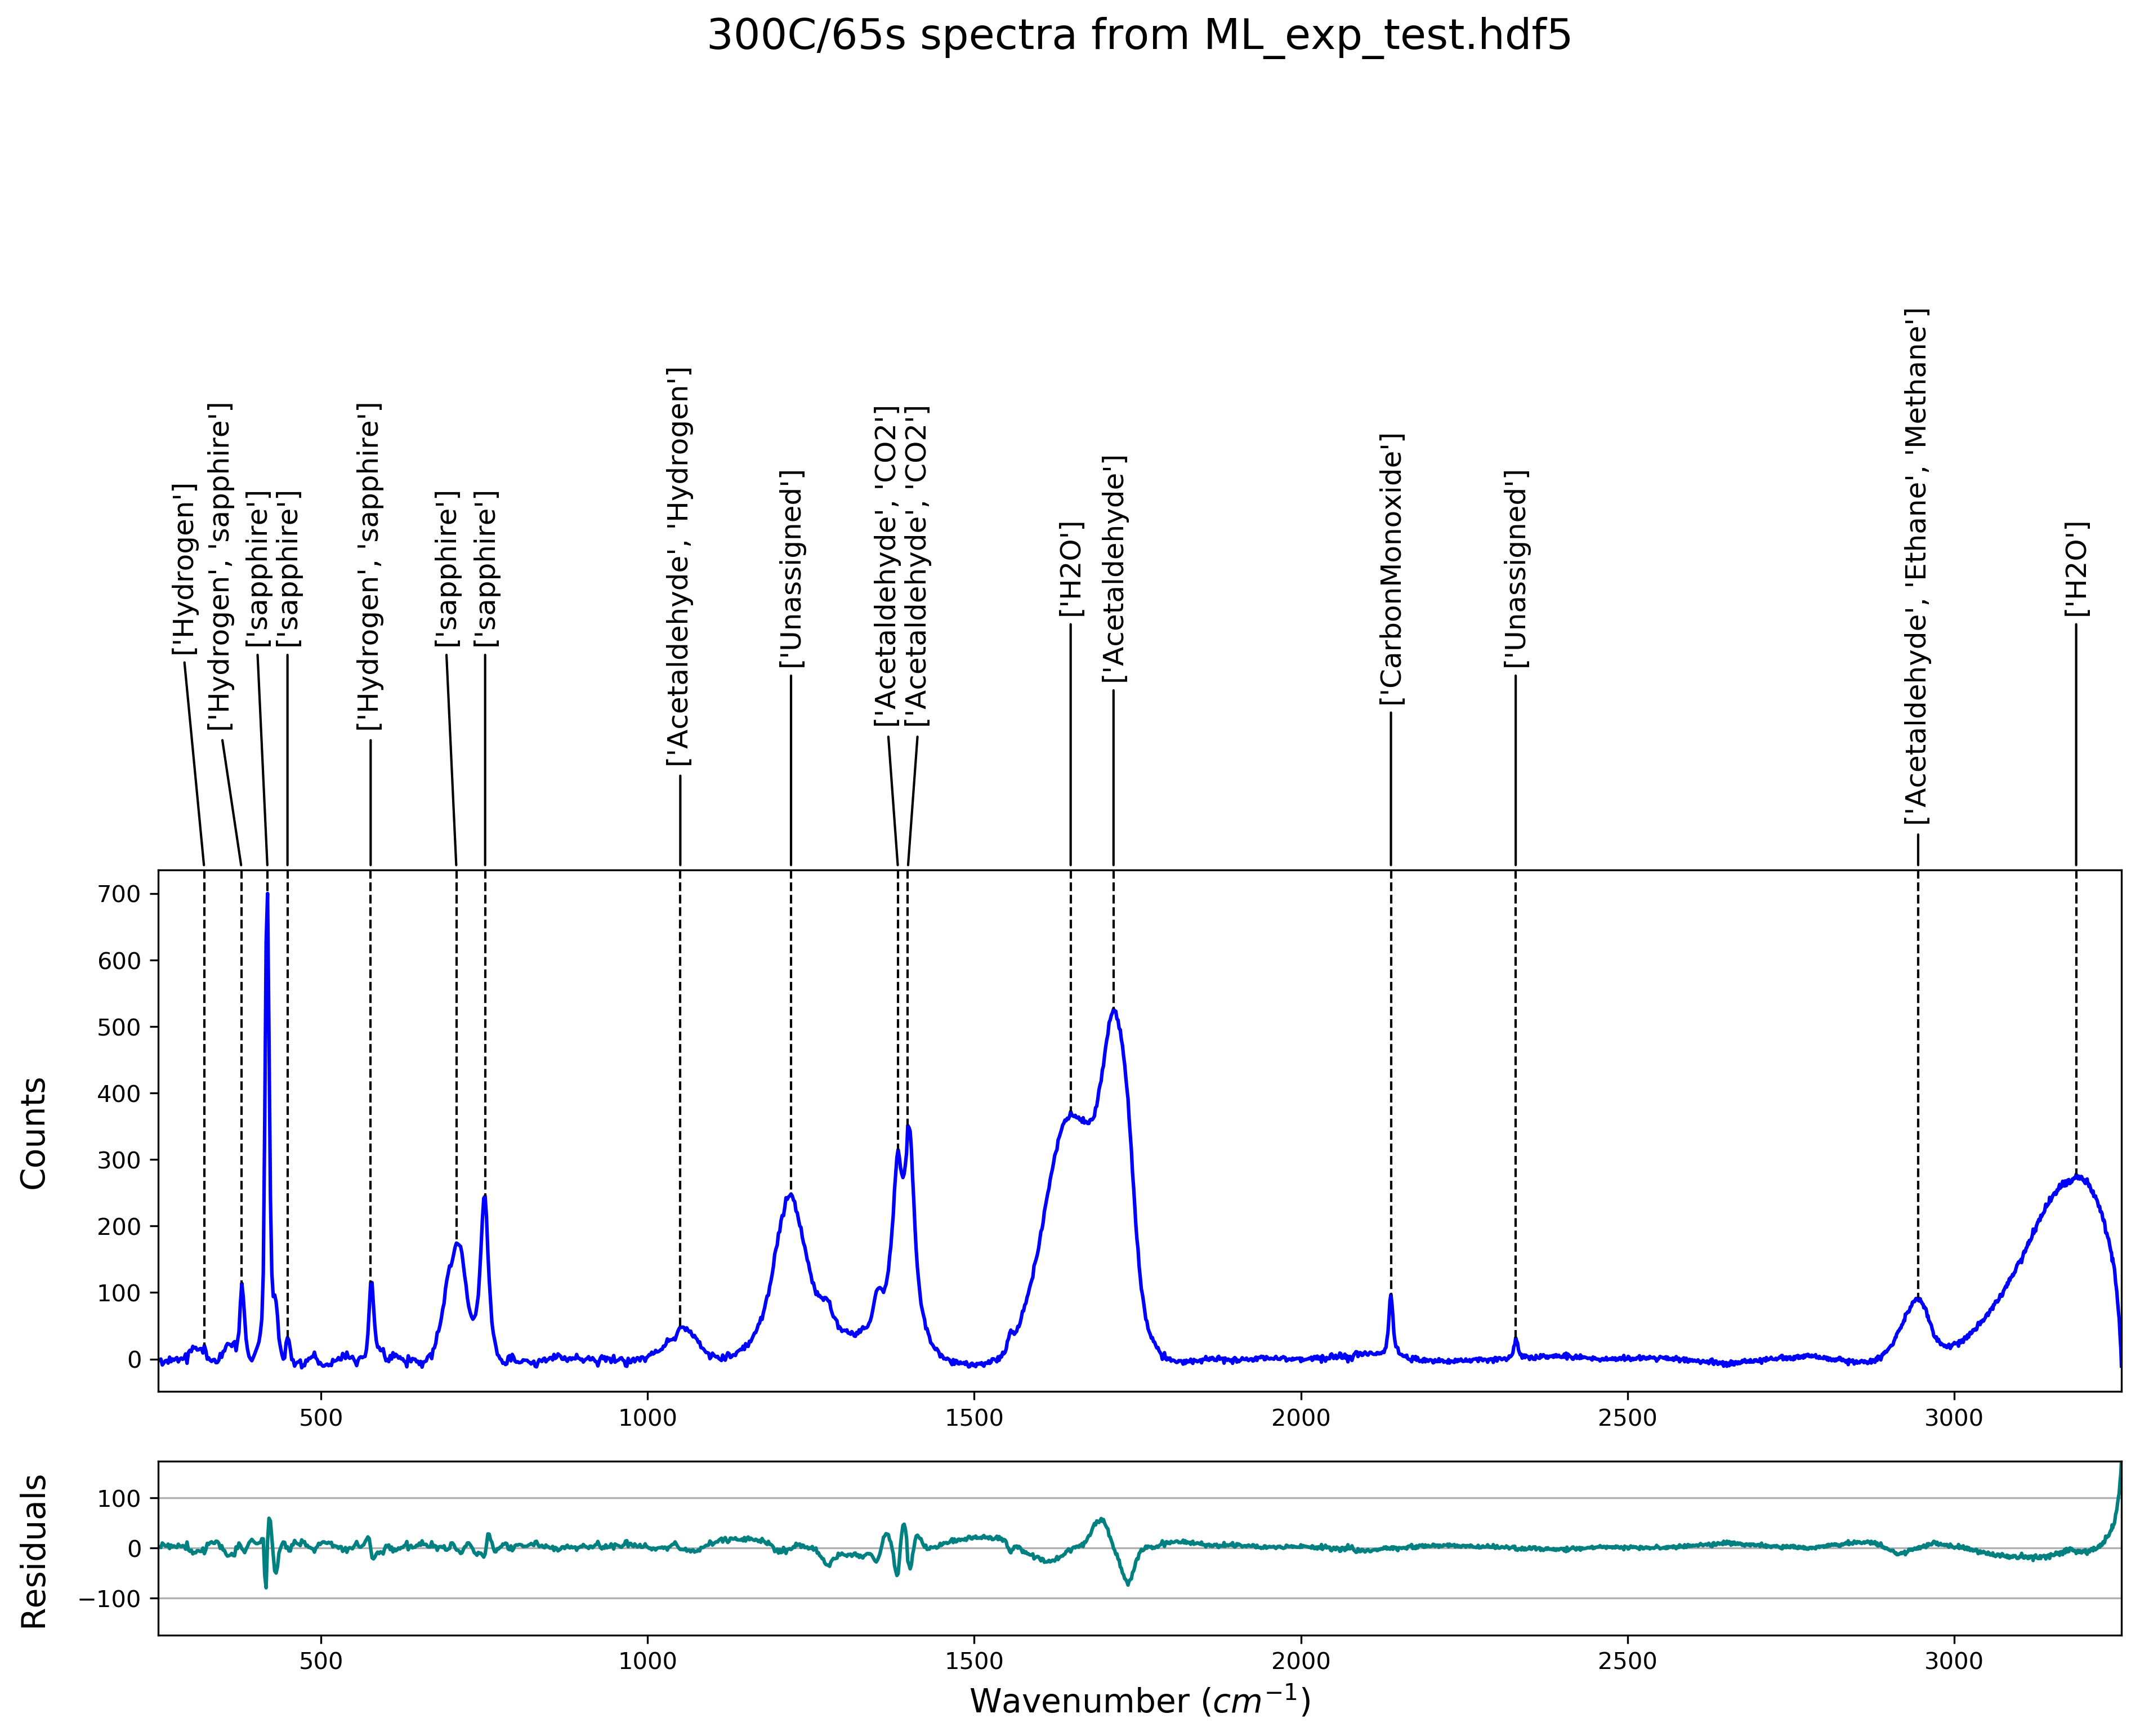

{'Acetaldehyde': 62.5, 'CO2': 100.0, 'CarbonMonoxide': 100.0, 'Ethane': 33.33333333333333, 'H2O': 100.0, 'Hydrogen': 100.0, 'Methane': 100.0, 'Propane': 0.0, 'sapphire': 150.0}


In [15]:
hdf5_calfilename = 'ML_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'ML_exp_test.hdf5'
key = '300C/65s'
df5 = peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50)


In [16]:
frames = [df1,df2,df3,df4,df5]
result = pd.concat(frames,axis=0, join='outer', join_axes= None, ignore_index=False,
          keys=['25s','35s','45s','55s','65s'], levels=None,  names=None, verify_integrity=False,
          copy=True,sort=True)
result

0        1       2        3        4        5        6  \
25s 0  2.66632e-06  9.47784  314.77  251.853  18.9557  12.4817  251.852   
    0     0.506813   4.0129  378.71  1034.01   8.0258   101.26  1028.59   
    0     0.636782  3.84759  418.14  7306.16  7.69519  708.864  7270.35   
    0  2.55231e-05  2.69962  448.67  193.734  5.39924  33.7084  193.741   
    0     0.188666  4.21062  578.11  1090.47  8.42124   114.25  1089.49   
    0  1.38778e-15  20.4979  711.51  6837.15  40.9957  156.677  6837.15   
    0  6.88713e-07  7.19462  751.21  3533.44  14.3892  230.689  3533.44   
    0            0  18.0052  1055.9  1438.24  36.0103  37.5207  1438.24   
    0     0.841161  29.1589  1217.6  20781.3  58.3177  243.997  20534.1   
    0            1  15.8466  1400.1  15275.1  31.6932  306.831  15166.6   
    0  1.05175e-05  47.9173  1649.3  35138.2  95.8346  344.448  35138.2   
    0     0.179058   26.217  1714.9  25828.1   52.434  436.042  25776.7   
    0            1  3.77176  2137.9  285.944  7.54351  24.1317  285.521   
    0     0.489606  3.60812  2328.9  255.955  7.21624  28.0624  255.753   
    0  1.60982e-15  21.9786  2948.2  3553.09  43.9572  75.9353  3553.09   
    0     0.553011  79.8096  3185.1  53203.1  159.619  257.309  41554.6   
35s 0     0.493198  3.84136  378.71   985.18  7.68271  101.316   980.38   
    0     0.642997  3.81059  418.14  7232.34  7.62118   706.73  7196.91   
    0  1.07692e-14  2.61594  450.84  150.018  5.23189  26.9372  150.027   
    0     0.490083  4.12695  578.11  1229.31   8.2539  117.814  1226.57   
    0     0.966028  4.26157  614.36    205.6  8.52315  15.6051  204.764   
    0  1.11022e-15  20.5743  711.51  7441.88  41.1487    169.9  7441.88   
    0  5.93652e-09  7.11561  751.21  3457.79  14.2312  228.257   3457.8   
    0            0  18.2118  1055.9  1501.97  36.4236  38.7388  1501.97   
    0     0.799162  29.0338  1217.6  21598.4  58.0676  259.413  21355.3   
    0            1  15.7745  1400.1  16283.5  31.5491   328.58  16168.3   
    0   4.7038e-08  52.5427  1651.1  37279.7  105.085  333.271  37279.7   
    0     0.177272  26.9016  1713.2    26193  53.8033  431.212  26140.1   
    0     0.982646  4.00883  2137.9  532.343  8.01767  42.6181  531.501   
    0  2.80814e-11  3.97073  2330.3  209.439  7.94147  24.7756  209.423   
...            ...      ...     ...      ...      ...      ...      ...   
55s 0  1.44026e-09  22.0598  450.84  564.472  44.1196  12.0193  564.472   
    0     0.509279  3.81534  575.97  1151.78  7.63068  118.522  1149.33   
    0     0.125301  18.4357  709.41  7213.89  36.8713  176.378  7200.26   
    0   5.8314e-10  7.57921  749.13  3701.02  15.1584  229.369  3701.01   
    0            0  19.0761  1053.9  1560.08  38.1521  38.4145  1560.08   
    0     0.837027  29.9571  1219.5  21520.9  59.9142  246.397  21259.4   
    0     0.999431  16.8627  1400.1  16775.7  33.7254  316.753  16648.9   
    0  0.000354236  48.4212  1649.3  35335.2  96.8425  342.736  35334.9   
    0    0.0432547  26.4808  1714.9  25175.4  52.9617  440.337  25163.2   
    0     0.989022  3.85657  2137.9  903.036  7.71313  74.9231  901.675   
    0     0.356573  4.32746  2328.9  264.943  8.65492  25.4525  264.738   
    0    0.0137614  22.9553  2947.2  4037.55  45.9106  82.2513  4036.09   
    0     0.288957  99.0366  3195.3  58776.6  198.073  252.805  43281.8   
65s 0  1.37457e-07  32.0115  321.41  532.639   64.023  7.81565  530.245   
    0     0.565924  3.90552  378.71  1088.12  7.81105  106.996  1081.93   
    0     0.718582  3.79903  418.14  7499.13  7.59806  712.439   7458.2   
    0  6.24654e-05  2.40069  448.67  139.461  4.80138  27.2864  139.475   
    0     0.558314  4.37962  575.97  1294.38  8.75925   113.84  1290.89   
    0  4.44089e-16  19.3868  707.31  6974.83  38.7736  168.992  6974.83   
    0    0.0110719  7.72501  751.21  3741.78    15.45  226.707  3741.54   
    0  5.55112e-16   20.728    1050  1666.05  41.4559  37.7545  1666.05   
    0     0.902482  31.0561  1219.5  22745

In [17]:
dat = pd.DataFrame()

In [18]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
encoded_value = le.fit_transform(["['Hydrogen']", "['Hydrogen', 'sapphire']", "['sapphire']", "['Unassigned']", "['CO2']", "['H2O']", "['CarbonMonoxide']"])
print(encoded_value)

# to give numeric values for the labels

[4 3 6 5 0 2 1]


In [19]:
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['center']= result[:][2]
dat['labels']= result[:][7]

In [20]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
25s 0  2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
    0     0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
    0     0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
    0  2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
    0     0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
    0  1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
    0  6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
    0            0  18.0052   1438.24  36.0103  37.5207  1438.24   
    0     0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
    0            1  15.8466   15275.1  31.6932  306.831  15166.6   
    0  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
    0     0.179058   26.217   25828.1   52.434  436.042  25776.7   
    0            1  3.77176   285.944  7.54351  24.1317  285.521   
    0     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
    0  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
    0     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
35s 0     0.493198  3.84136    985.18  7.68271  101.316   980.38   
    0     0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
    0  1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
    0     0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
    0     0.966028  4.26157     205.6  8.52315  15.6051  204.764   
    0  1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
    0  5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
    0            0  18.2118   1501.97  36.4236  38.7388  1501.97   
    0     0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
    0            1  15.7745   16283.5  31.5491   328.58  16168.3   
    0   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
    0     0.177272  26.9016     26193  53.8033  431.212  26140.1   
    0     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
    0  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...            ...      ...       ...      ...      ...      ...   
55s 0  1.44026e-09  22.0598   564.472  44.1196  12.0193  564.472   
    0     0.509279  3.81534   1151.78  7.63068  118.522  1149.33   
    0     0.125301  18.4357   7213.89  36.8713  176.378  7200.26   
    0   5.8314e-10  7.57921   3701.02  15.1584  229.369  3701.01   
    0            0  19.0761   1560.08  38.1521  38.4145  1560.08   
    0     0.837027  29.9571   21520.9  59.9142  246.397  21259.4   
    0     0.999431  16.8627   16775.7  33.7254  316.753  16648.9   
    0  0.000354236  48.4212   35335.2  96.8425  342.736  35334.9   
    0    0.0432547  26.4808   25175.4  52.9617  440.337  25163.2   
    0     0.989022  3.85657   903.036  7.71313  74.9231  901.675   
    0     0.356573  4.32746   264.943  8.65492  25.4525  264.738   
    0    0.0137614  22.9553   4037.55  45.9106  82.2513  4036.09   
    0     0.288957  99.0366   58776.6  198.073  252.805  43281.8   
65s 0  1.37457e-07  32.0115   532.639   64.023  7.81565  530.245   
    0     0.565924  3.90552   1088.12  7.81105  106.996  1081.93   
    0     0.718582  3.79903   7499.13  7.59806  712.439   7458.2   
    0  6.24654e-05  2.40069   139.461  4.80138  27.2864  139.475   
    0     0.558314  4.37962   1294.38  8.75925   113.84  1290.89   
    0  4.44089e-16  19.3868   6974.83  38.7736  168.992  6974.83   
    0    0.0110719  7.72501   3741.78    15.45  226.707  3741.54   
    0  5.55112e-16   20.728   1666.05  41.4559  37.7545  1666.05   
    0     0.902482  31.0561   22745.5  62.1121  243.944  22436.6   
    0  1.27676e-15  26.8925   9971.42  53.7849  174.166  9971.42   
    0  8.34162e-07  13.8121   5116.15  27.6241  173.989  5116.15   
    0     0.431989  43.0559   37745.3  86.1117  354.444  37446.6   
    0  4.23093e-07  27.3748   25712.1  54.7496  441.188  25712.1   
    0     0.912483  3.84124   1113.09  7.68249  96.0772  1111.58  

Text(0, 0.5, 'auc')

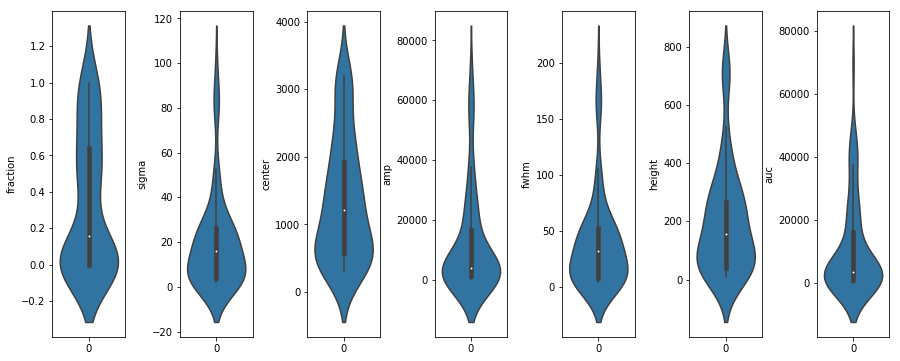

In [21]:
import scipy
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
fig, ax = plt.subplots(ncols=7, figsize=(15, 6))
plt.subplots_adjust(wspace=.75, hspace=.75) 
sns.violinplot(data=dat['fraction'], ax=ax[0],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['sigma'],ax=ax[1],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['center'], ax=ax[2],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['amplitude'],ax=ax[3],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['fwhm'], ax=ax[4],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['height'],ax=ax[5],showfliers=True) #boxplot with Outliers are removed from the dataset
sns.violinplot(data=dat['auc'],ax=ax[6],showfliers=True) #boxplot with Outliers are removed from the dataset

ax[0].set_ylabel('fraction') 
ax[1].set_ylabel('sigma') 
ax[2].set_ylabel('center') 
ax[3].set_ylabel('amp') 
ax[4].set_ylabel('fwhm') 
ax[5].set_ylabel('height') 
ax[6].set_ylabel('auc') 

In [ ]:
key_list

In [22]:
hdf5_calfilename = 'ML_calibration_test.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'ML_calibration_test.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

NameError: name 'key_list' is not defined

In [ ]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [ ]:
cal = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [ ]:
cal

In [ ]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics

# Logistic Regression (Not working so far, NEED Help)

In [ ]:
# fig, ax = plt.subplots(figsize=(5, 3))
# y = dat['fraction'].values
# x = dat['height'].values
# # Create the linear regression model
# LogRegr = linear_model.LogisticRegression() 
# # plotting the balance
# ax.scatter(dat['height'], dat['fraction'], label = 'balance default',color='r')

# # fit the linear model 
# LogRegr.fit(x.reshape(-1,1),y.reshape(-1,1))
# xres = np.array(x).reshape(-1,1)
# plt.plot(x,LogRegr.predict_proba(xres)[:,1],'o',label = 'fit')
# # Find the coefficients B0 and B1
# print('B0, B1: ',LogRegr.intercept_, LogRegr.coef_[0])
# ax.set_ylabel('Probability Default')
# ax.set_xlabel('Balance')
# ax.set_title('Probability Default vs. Balance')
# plt.legend()

# Ordinary Least squares Regression Model by StatsModels (Not working so far, NEED Help)

In [ ]:
# # # Ordinary least squares regression model
# results = smf.ols(formula = 'auc ~ height*sigma', data = dat)
# # Fit the results
# resultfit = results.fit()
# # Inspect the results
# print(resultfit.summary())

In [ ]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','labelencoded']
X_train=cal[inputs]
y_train = cal['center']
X_test=dat[inputs]
y_test= dat['center']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1010)

In [ ]:
X_train

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors=15) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [ ]:
KNNmodel.fit(X_train, y_train) # feed the model some training data 

In [ ]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

In [ ]:
# rate.mean() ratio of trues 
rate.mean()

In [ ]:
KNNmodel

# Knn visualiztion (not working, NEED help)

In [ ]:
# # additional library we will use 
# from matplotlib.colors import ListedColormap

# # just for convenience and similarity with sklearn tutorial
# # I am going to assign our X and Y data to specific vectors
# # this is not strictly needed and you could use elements df for the whole thing!
# elements = dat
# X=elements[['height','auc']]
# print(X)
# #this is a trick to turn our strings (type of element / class) into unique 
# #numbers.  Play with this in a separate cell and make sure you know wth is 
# #going on!
# levels,labels=pd.factorize(elements.labels)
# y=levels
# print(levels)
# #This determines levelspacing for our color map and the colors themselves
# h=0.02
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# # in the sklearn tutorial two different weights are compared
# # the decision between "uniform" and "distance" determines the probability
# # weight.  "uniform" is the version presented in class, you can change to 
# # distance
# # weights='uniform'
# weights='distance'

# # I am actually refitting the KNN here. If you had a big data set you would
# # not do this, but I want you to have the convenience of changing K or 
# # weights here in this cell. Large training sets with many features can take 
# # awhile for KNN training! 

# K=5
# clf = KNeighborsClassifier(n_neighbors=K, weights=weights)
# clf.fit(X,y)

# # Straight from the tutorial - quickly read and see if you know what these 
# # things are going - if you are < 5 min until end then you should skip this part 

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = elements.height.min() - 0.1  , elements.height.max() + 0.1
# y_min, y_max = elements.auc.min() - 0.1  , elements.auc.max() + 0.1  
# print(y_min, y_max, h)
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
#                      np.arange(y_min, y_max, h))

# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(figsize=(4,4));
# #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light,vmin=0,vmax=np.max(y))
# # Plot also the training points
# # This may be the 1st time you have seen how to color points by a 3rd vector
# # In this case y ( see c=y in below statement ). This is very useful! 
# plt.scatter(X.height, X.auc, c=y, cmap=cmap_bold)

# # Set limits and lebels 
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xlabel('height')
# plt.ylabel('auc')

# Multiple Linear Regression

In [ ]:
train,test = train_test_split(dat, test_size=0.2, random_state=1000)

In [ ]:
numdescriptors = 8
# train linear model of descriptors
yrange =  np.arange(1,numdescriptors,1)
for Y in yrange:
    MLR=linear_model.LinearRegression()
    MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
    # WE are going to train using the first 8 values

    # make predictions on test and train set 
    trainpred=MLR.predict(train[train.columns.values[0:Y]])
    # predict the outputs using the training dataset
    testpred=MLR.predict(test[train.columns.values[0:Y]])
    # predict using test dataset
    #make parity plot 
    maxlimit  = train[train.columns.values[Y]].max()

    plt.figure(figsize=(7,7))
    plt.xlim([0,maxlimit]);
    plt.ylim([0,maxlimit]);
    print('This is for Y ='+str(Y))
    plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
    plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
    plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

    #calculate the test and train error
    
    print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
    print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
    # usually the training error is less than the test error

In [ ]:
plt.plot(x,yactual,color='red',lw='3',label='actual')
plt.plot(x,regr.predict(x.reshape(-1,1)),ls='--',label='fit')
plt.legend(loc='lower right')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, yactual, label='actual')
ax.scatter(x, yrand, label='measured')
ax.scatter(x, regr.predict(x.reshape(-1,1)), label='predicted')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(yrand, regr.predict(x.reshape(-1,1)), label='parity')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(x, regr.predict(x.reshape(-1,1)) - yrand)
ax.plot(x, 0*x)

# Changing begining and ending columns to describe regression relationships
# ie changing X and Y
# NEEED TO CHECK WHETHER Y=6 means AUC is the comparison column
# THis will relate to which descriptor i am trying to relate

In [ ]:
numdescriptors = 6 # Y= 6 if AUC must be last Y cannot be 7

In [ ]:
xrange =  np.arange(0,numdescriptors,1)
Y=numdescriptors
for X in xrange:    
    MLR=linear_model.LinearRegression()
    MLR.fit(train[train.columns.values[X:Y]],train[train.columns.values[Y]])
    # WE are going to train using the first 8 values

    # make predictions on test and train set 
    trainpred=MLR.predict(train[train.columns.values[X:Y]])
    # predict the outputs using the training dataset
    testpred=MLR.predict(test[train.columns.values[X:Y]])
    # predict using test dataset
    #make parity plot 
    maxlimit  = train[train.columns.values[Y]].max()
    print(maxlimit)
    plt.figure(figsize=(7,7))
    plt.xlim([0,maxlimit]);
    plt.ylim([0,maxlimit]);
    print('This is for X ='+str(X)+ '& Y ='+str(Y))
    plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
    plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
    plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

    #calculate the test and train error
    
    print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
    print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
    # usually the training error is less than the test error

# Ridge & Lasso Regression

In [ ]:
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#normalized data for Ridge / LASSO 
# train_normalized=train/train.std()
# test_normalized=test/test.std()
scaler = StandardScaler().fit(train[inputs])
train_normalized = pd.DataFrame(data=scaler.transform(train[inputs]), columns=train.columns[:-1])
test_normalized = pd.DataFrame(data=scaler.transform(test[inputs]), columns=test.columns[:-1])
# Columns cannot have strings because could not convert string to float: "['H2O']"

In [ ]:
test_normalized.head() 

In [ ]:
raman_ridge=Ridge()
numdescriptors = 7 # Y=6 for AUC to be last
yrange =  np.arange(1,numdescriptors,1)
for Y in yrange:
    a=1e1
    raman_ridge.set_params(alpha=a)
    raman_ridge.fit(train_normalized[train.columns.values[0:Y]],train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",mean_squared_error(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[0:Y]])))

    print("Test error",mean_squared_error(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[0:Y]])))
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[0:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[0:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

In [ ]:
# RIDGE REGRESSION LOOKING AT RELATIONSHIPS OF ALL Descriptors vs. AUC I think!!
raman_ridge=Ridge()
numdescriptors = 7
yrange =  np.arange(1,numdescriptors,1)
for Y in yrange:
    a=1e1
    raman_ridge.set_params(alpha=a)
    raman_ridge.fit(train_normalized[train.columns.values[0:Y]],
                    train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",mean_squared_error(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[0:Y]])))

    print("Test error",mean_squared_error(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[0:Y]])))
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[0:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[0:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

In [ ]:
raman_ridge=Ridge()
numdescriptors = 6 # Y=6 for AUC to be last
xrange =  np.arange(0,numdescriptors,1)
Y=numdescriptors
for X in xrange:
    a=1e1
    raman_ridge.set_params(alpha=a)
    raman_ridge.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    print('This is for X ='+str(X)+'& Y =' + str(Y))
    print("Train error",mean_squared_error(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[X:Y]])))

    print("Test error",mean_squared_error(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[X:Y]])))
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],raman_ridge.predict(
            train_normalized[train.columns.values[X:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],raman_ridge.predict(
            test_normalized[train.columns.values[X:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

## 2-2 Example of searching the $\alpha$ space in RR

In [ ]:
train,test = train_test_split(dat, test_size=0.2, random_state=1000)

In [ ]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = numdescriptors
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]])))
    testerror.append(mean_squared_error(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]])))


In [ ]:
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')


# Part 3: LASSO regression  (same data as Part 1)

* The lasso improves over ridge by also providing a variable selection tool!
* The lasso minimizer is $RSS + \lambda \sum_{j=1}^{p}\lvert\beta_j\rvert$
* Ridge regression does not set any of the coefficients exactly to zero but can shrink all of them
- final model still includes all p predictors
- Lasso is similar to ridge regression with a absolute value
- It provides the possibility that some of the coeeficients can take a value of zero.
- Like ri

In [ ]:
# also based on sklearn tutorials
# what the hell is happening in this cell?
coefs = []
trainerror = []
testerror = []

lambdas = np.logspace(-6,6,200)
model=linear_model.Lasso()
numdescriptors = 6 # Y must be 6 for AUC to be last
Y = numdescriptors
X = 0
# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l,max_iter=1e6)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]])))
    testerror.append(mean_squared_error(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]])))
yrange =  np.arange(1,7,1)
for Y in yrange:
    a=1e1
    model.set_params(alpha=a)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",trainerror[Y])
    print("Test error",testerror[Y])
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

In [ ]:
# also based on sklearn tutorials
# what the hell is happening in this cell?
coefs = []
trainerror = []
testerror = []

lambdas = np.logspace(-6,6,200)
model=linear_model.Lasso()
numdescriptors = 6 # Y must be 6 for AUC to be last
Y = numdescriptors
X = 0
# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l,max_iter=1e6)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]])))
    testerror.append(mean_squared_error(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]])))
xrange =  np.arange(0,numdescriptors-1,1)
for X in xrange:
    a=1e1
    model.set_params(alpha=a)
    model.fit(train_normalized[train.columns.values[X:Y]],train_normalized[train.columns.values[Y]])
    print('This is for Y ='+str(Y))
    print("Train error",trainerror[Y])
    print("Test error",testerror[Y])
    plt.figure(figsize=(7,7))
    plt.xlim([-2.5,2.5]);
    plt.ylim([-2.5,2.5]);
    plt.scatter(train_normalized[train.columns.values[Y]],model.predict(
        train_normalized[train.columns.values[X:Y]]), label='Training')
    plt.scatter(test_normalized[train.columns.values[Y]],model.predict(
        test_normalized[train.columns.values[X:Y]]),color='r', label='Test')
    maxlimit  = train[train.columns.values[Y]].max()
    minlimit  = train[train.columns.values[Y]].min()
    plt.plot([-2.5,2.5],[-2.5,2.5],lw=4,color='black')
    plt.legend()
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')

In [ ]:
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# WE SIMPLIFIED OUR MODEL BY GETTING RID OF THE RR COEFS NOT EQUAL TO ZERO AT ZERO LAMBDA.


### Other things to consider if you have more time 

* Note we did not scale the features in the MLR, try it out and verify the final error doesnt' change!
* Make sure you undersand how to make _predictions_ with supervised learning models that are trained on scaled/normalized data
* Plot the residuals and verify if errors are distributed normally
* Make a parity plot including the predictions from ridge and LASSO 
* Compare errors between all three 
* Explore the effect of training/testing split 
* Look at the shrinkage/regularization situation when predicting Y2 vs Y1...

# Trying to see if any of these descriptors 
# ['fraction','sigma','center','amplitude','fwhm','height','auc']

# can relate to the peakidentified labels


# Support Vector Machine 

In [ ]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X=dat[inputs]
y = dat['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010)

# Linear SVM

In [ ]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred),average='macro')

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred), average='macro')

# Polynomial kernal (https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/)

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  

In [ ]:
y_pred = svclassifier.predict(X_test)  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Gaussian SVM 

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

In [ ]:
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Sigmoid SVM

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

In [ ]:
y_pred = svclassifier.predict(X_test)  

In [ ]:
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be converted to floats anyways so the labelling relationship was not possible

In [ ]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree

In [ ]:
DT=tree.DecisionTreeRegressor(max_depth=3)
DT.fit(train[['fraction','sigma','center','amplitude','fwhm','height']],train.auc)

In [ ]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [ ]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [ ]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=['fraction','sigma','center','amplitude','fwhm','height'])
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

In [ ]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

In [ ]:
# make predictions on test and train set 
trainpred=DT.predict(train[['fraction','sigma','center','amplitude','fwhm','height']])
testpred=DT.predict(test[['fraction','sigma','center','amplitude','fwhm','height']])

maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(train.auc,trainpred, label ='train')
plt.scatter(test.auc,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(train.auc,trainpred))
print("Test error",mean_squared_error(test.auc,testpred))

In [ ]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeRegressor(max_depth=t)
    model.fit(train[['fraction','sigma','center','amplitude','fwhm','height']],train.auc)
    trainerror.append(mean_squared_error(train.auc,model.predict(
        train[['fraction','sigma','center','amplitude','fwhm','height']])))
    testerror.append(mean_squared_error(test.auc,model.predict(
        test[['fraction','sigma','center','amplitude','fwhm','height']])))

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((5,15))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')

# SVM from lecture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.7)
rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
data = (X, y)

In [ ]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

In [ ]:
figure, ax = plt.subplots(figsize=(4,4))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', label='Test')
#ax.set_xlim([-3,4])
#ax.set_ylim([0,4])
ax.legend()

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear', C=1)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

figure, ax = plt.subplots(figsize=(4,4))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zbi = Z > np.median(Z)
ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6, label='Test')

ax.legend()

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.8)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
data = (X, y)

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

In [ ]:
figure, ax = plt.subplots(figsize=(4,4))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k', label='Test')
#ax.set_xlim([-3,4])
#ax.set_ylim([0,4])
ax.legend()

In [ ]:
C_values = [0.00000001, 0.001, 0.1, 1, 10, 100, 1000, 10000]
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))

axes = [item for sublist in axes for item in sublist]

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for C, ax in zip(C_values, axes):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Zbi = Z > np.median(Z)
    ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', label='Training')
    # Plot the testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#                edgecolors='k', alpha=0.6, label='Test')

    ax.legend()
    ax.set_title('C Value: {}'.format(str(C)))

In [ ]:
from sklearn.datasets import make_circles

data = make_circles(noise=0.2, factor=0.5, random_state=1)
X, y = data

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

In [ ]:
clf = SVC(kernel='linear', C=1)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

figure, ax = plt.subplots(figsize=(4,4))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zbi = Z > np.median(Z)
ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6, label='Test')

ax.legend()

In [ ]:
clf = SVC(gamma=4, C=0.1)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

figure, ax = plt.subplots(figsize=(4,4))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Zbi = Z > np.median(Z)
ax.contourf(xx, yy, Zbi, cmap=cm, alpha=.1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6, label='Test')

ax.legend()

# Cross Validation from NN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed = 21899

In [ ]:
X = df[['mass', 'voc', 'jsc', 'e_homo_alpha', 'e_gap_alpha', 
        'e_lumo_alpha']].values
Y = df[['pce']].values

In [ ]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=seed)

In [ ]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train_pn)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)

In [ ]:
X_test = X_train_scaler.transform(X_test_pn)

In [ ]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (-1 * results.mean(), results.std()))

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=simple_model,
        epochs=150, batch_size=25000, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print('MSE mean: %.4f ; std: %.4f' % (-1 * results.mean(), results.std()))

# Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.linspace(0, 10, 1000)
y = 0.2*x + 1*x**2 - 0.3*x**3 + 0.021*x**4 + 0.3*np.random.rand(1000)*x

plt.scatter(x, y, alpha=0.1)

X = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'x6':x**6, 'x7':x**7, 'x8':x**8,
                  'x9':x**9, 'x10':x**10, 'x11':x**12, 'x13':x**13, 'x14':x**14, 'x15':x**15, 'x16':x**16, 'x17':x**17})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
reg = LinearRegression().fit(X_train[['x']], y_train) #Simple LINEAR REGRESSION with multiple polynomial 
#PUT IN ARRAYS OF ONE DATASET OR DATASET OF INDEPENDENT FEATURES
y_pred = reg.predict(X_test[['x']])

In [ ]:
plt.scatter(x, y, alpha=0.1)
plt.plot(X_test[['x']], y_pred, linewidth=2)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y, alpha=0.1)
mse = np.zeros(17)

for i in range(1, 17):
    reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)
    y_pred = reg.predict(X_test[X_test.columns[0:i].values])

    ax.scatter(X_test[['x']], y_pred, marker='o', s=25, label=i)
    mse[i-1] = mean_squared_error(y_test, y_pred)
    ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.linspace(1, 16, 17), mse, linewidth=4)
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Degree of Polynomial')

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

for run in range(8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    mse = np.zeros(17)

    for i in range(1, 18):
        reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)
        y_pred = reg.predict(X_test[X_test.columns[0:i].values])

        mse[i-1] = mean_squared_error(y_test, y_pred)

    
    ax.plot(np.linspace(1, 16, 17), mse, linewidth=4, color='b', alpha=0.2)
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')

# Kfold validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X, y)

In [ ]:
kf.split(X,y) # now is an iterator

In [ ]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X, y)

fig, ax = plt.subplots(figsize=(8,6))

mse = np.zeros((17, 10))
j = 0
for train_index, test_index in kf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for i in range(1, 18):
        reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)
        y_pred = reg.predict(X_test[X_test.columns[0:i].values])

        mse[i-1, j] = mean_squared_error(y_test, y_pred)

    
    ax.plot(np.linspace(1, 16, 17), mse[:, j], linewidth=4, color='b', alpha=0.09)
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    j += 1
    
avg_mse = mse.mean(axis=1)
ax.plot(np.linspace(1, 16, 17), avg_mse, color='purple')

In [ ]:
avg_mse

In [ ]:
df = pd.read_excel('../examples/quad.xlsx')

# Neural Networks 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

# fit_result[i][0] = p[i]_fraction
# fit_result[i][1] = p[i]_simga
# fit_result[i][2] = p[i]_center
# fit_result[i][3] = p[i]_amplitude
# fit_result[i][4] = p[i]_fwhm
# fit_result[i][5] = p[i]_height
# fit_result[i][6] = p[i]_area under the curve